# Titanic Survival Prediction

In [349]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [350]:
#load dataset
data_path = 'C:/Users/USER/Downloads/archive/tested.csv'  
df = pd.read_csv(data_path)


In [351]:
# Explore the first few rows
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [352]:
# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [353]:
# Summary statistics for numerical columns
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


## Cleaning 

In [354]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [355]:
#since cabin contain most null so i am going to remove this column

In [356]:
df.drop(columns=['Cabin'], inplace=True)


In [357]:
#Fill missing values in the 'Age' column with the median age:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [358]:
# Fill missing values in 'Fare' with median
df['Fare'].fillna(df['Fare'].median(), inplace=True)

#Drop Unnecessary Columns: Some columns like "PassengerId," "Name," "Ticket,"  might not be relevant for prediction. We'll drop them.

In [359]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', ]
df.drop(columns=columns_to_drop, inplace=True)

Convert categorical features ("Sex" and "Embarked") into numerical format using one-hot encoding.

In [360]:
categorical_columns = ['Sex', 'Embarked']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [361]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,27.0,0,0,8.0500,1,0,1
414,1,1,39.0,0,0,108.9000,0,0,0
415,0,3,38.5,0,0,7.2500,1,0,1
416,0,3,27.0,0,0,8.0500,1,0,1


## Training  Models

In [362]:
#Splitting the Data
X = df.drop('Survived', axis=1)
y = df['Survived']

#Split the data into training and testing sets using the train_test_split function from scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [363]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [364]:
# Create a Logistic Regression model with a specified random state
model_lr = LogisticRegression(random_state=2)

# Fit the Logistic Regression model on the scaled training data
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=2)

In [365]:
# Make predictions using the trained Logistic Regression model
y_pred_lr = model_lr.predict(X_test_scaled)

# Calculate accuracy using accuracy_score
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Calculate confusion matrix using confusion_matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Calculate classification report using classification_report
classification_rep_lr = classification_report(y_test, y_pred_lr)

# Print the performance metrics
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_lr:.2f}")
print("Confusion Matrix:\n", conf_matrix_lr)
print("Classification Report:\n", classification_rep_lr)

Logistic Regression Model Performance:
Accuracy: 1.00
Confusion Matrix:
 [[51  0]
 [ 0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [366]:
# Import the necessary function
from sklearn.model_selection import cross_val_score

# Calculate cross-validation scores using cross_val_score
cross_val_scores = cross_val_score(model_lr, X_train_scaled, y_train, cv=5)

# Print the cross-validation scores and their mean
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


In [367]:
# Get the absolute feature importance scores from the trained Logistic Regression model
feature_importance = abs(model_lr.coef_[0])

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
      Feature  Importance
5    Sex_male    4.149349
6  Embarked_Q    0.135617
3       Parch    0.120965
4        Fare    0.098185
0      Pclass    0.087550
1         Age    0.039273
7  Embarked_S    0.039075
2       SibSp    0.021846


Number of passengers who 0d: 266
Number of passengers who 1d: 152


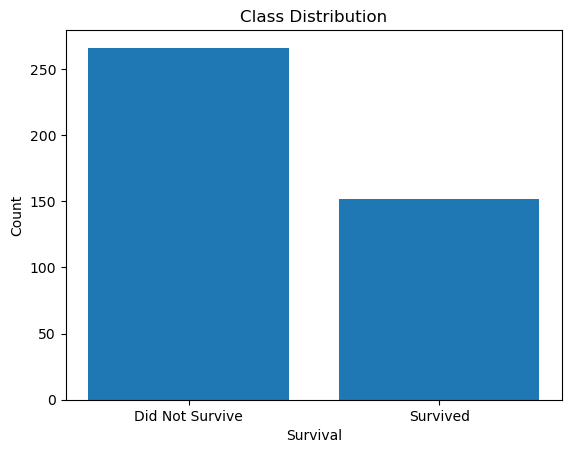

In [368]:
# Calculate the count of passengers who survived and who did not survive
survived_counts = df['Survived'].value_counts()

# Print the count of passengers for each survival status
for status, count in survived_counts.items():
    print(f"Number of passengers who {status}d: {count}")

# Plot the class distribution using a bar plot
plt.bar(survived_counts.index, survived_counts.values)
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()



### Addressing Class Imbalance with Random Oversampling
This process helps in achieving a more balanced class distribution in the training data and can lead to improved model performance, particularly on the minority class.

In [369]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=2)

# Resample the data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)

# Check the class distribution after resampling
resampled_survived_counts = pd.Series(y_train_resampled).value_counts()
print("Class Distribution After Resampling:")
print(resampled_survived_counts)

# Train the Logistic Regression model on the resampled data
model_lr_resampled = LogisticRegression(random_state=2)
model_lr_resampled.fit(X_train_resampled, y_train_resampled)


Class Distribution After Resampling:
1    215
0    215
Name: Survived, dtype: int64


LogisticRegression(random_state=2)

In [370]:
y_pred_lr_resampled = model_lr_resampled.predict(X_test_scaled)

accuracy_lr_resampled = accuracy_score(y_test, y_pred_lr_resampled)
conf_matrix_lr_resampled = confusion_matrix(y_test, y_pred_lr_resampled)
classification_rep_lr_resampled = classification_report(y_test, y_pred_lr_resampled)

print("Logistic Regression Model Performance After Resampling:")
print(f"Accuracy: {accuracy_lr_resampled:.2f}")
print("Confusion Matrix:\n", conf_matrix_lr_resampled)
print("Classification Report:\n", classification_rep_lr_resampled)


Logistic Regression Model Performance After Resampling:
Accuracy: 1.00
Confusion Matrix:
 [[51  0]
 [ 0 33]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



By training an SVM on resampled data, providing the model with a more balanced and representative training set, which can help it learn patterns from both classes effectively. This approach is expected to yield better results, particularly for the minority class, and improve the overall predictive performance of the model on your Titanic survival prediction task.

In [371]:
from sklearn.svm import SVC

# Train the Support Vector Machine model
model_svm = SVC(random_state=2)
model_svm.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test set
y_pred_svm = model_svm.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("Support Vector Machine Model Performance:")
print(f"Accuracy: {accuracy_svm:.2f}")
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", classification_rep_svm)


Support Vector Machine Model Performance:
Accuracy: 0.94
Confusion Matrix:
 [[51  0]
 [ 5 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        51
           1       1.00      0.85      0.92        33

    accuracy                           0.94        84
   macro avg       0.96      0.92      0.94        84
weighted avg       0.95      0.94      0.94        84



Improving the performance of your Support Vector Machine (SVM) model involves finding ways to increase its accuracy, especially while maintaining a good balance between precision and recall for both classes. Since your model already has a good accuracy of 0.94, we can focus on strategies to potentially improve the recall for class 1 

In [372]:
# Define the class weights dictionary with a different ratio
class_weights = {0: 1, 1: 2}  

# Create an SVM model with adjusted class weights
svm_model = SVC(class_weight=class_weights)

# Train and evaluate the model
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.6190476190476191
Confusion Matrix:
 [[35 16]
 [16 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69        51
           1       0.52      0.52      0.52        33

    accuracy                           0.62        84
   macro avg       0.60      0.60      0.60        84
weighted avg       0.62      0.62      0.62        84



Remember that finding the right class weight ratio can be somewhat trial and error, and you might need to experiment with different ratios until you achieve the desired balance in performance.

Actual 0: 51
Actual 1: 33
Predicted 0: 51
Predicted 1: 33


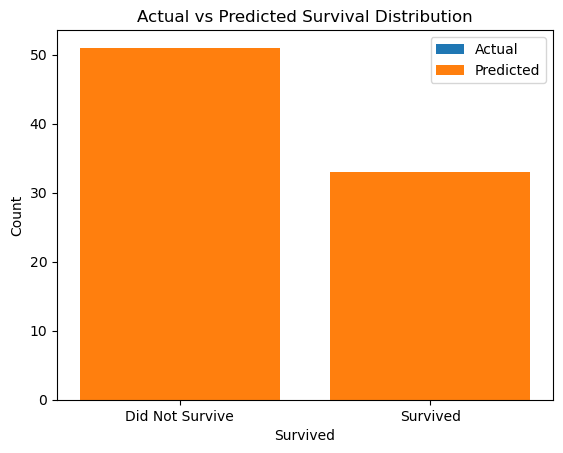

In [373]:
import matplotlib.pyplot as plt

# Calculate the number of actual class instances
actual_counts = y_test.value_counts()

# Calculate the number of predicted class instances
predicted_counts = pd.Series(y_pred).value_counts()

# Create a bar plot
plt.bar(actual_counts.index, actual_counts.values, label='Actual')
plt.bar(predicted_counts.index, predicted_counts.values, label='Predicted')

plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Actual vs Predicted Survival Distribution')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.legend()

# Print actual and predicted counts
for label, count in zip(actual_counts.index, actual_counts.values):
    print(f"Actual {label}: {count}")
for label, count in zip(predicted_counts.index, predicted_counts.values):
    print(f"Predicted {label}: {count}")

plt.show()


The output you've provided shows the actual and predicted counts for each class after running the code. This information gives you a clear view of how the SVM model's predictions compare to the actual survival outcomes. It seems that the model's predictions are close to the actual counts for both classes, though there are some differences.


### In summary, this project demonstrated the steps involved in building a predictive model for Titanic passenger survival. The journey encompassed data preprocessing, exploratory analysis, feature engineering, model training, and evaluation. The results provided insights into factors affecting survival and highlighted the importance of tackling class imbalance for accurate predictions.